In [12]:
import os
import gzip
import numpy as np
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

def load_mnist(path, kind='train'):

    """Load MNIST data from `path`, save it as numpy.ndarray"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

class MnistDataset(Dataset):
    def __init__(self, data, targets, transform):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index].reshape(28, 28).astype(np.uint8)
        y = torch.tensor(self.targets[index])
        x = self.transform(x).squeeze()
        return x, y

    def __len__(self):
        return len(self.data)

In [33]:
from source import dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
train_loader, test_loader = dataset.get_mnist_data(device, train_batch_size=10, test_batch_size=10)
# print(train_dataset[0])
print(train_loader)
print(test_loader)

cpu


In [41]:
for i, data in enumerate(train_loader):
    if i >= 1:
        break
    print(data[0].shape)
    print(data[1].shape)
    print(i, data)

torch.Size([10, 28, 28])
torch.Size([10])
0 [tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 

tensor(5, dtype=torch.uint8)
torch.Size([28, 28])


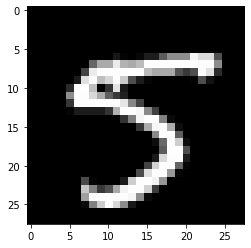

In [42]:
import matplotlib.pyplot as plt
train_images, train_labels = load_mnist('data/MNIST', kind='train')  # ndarray, each row is an image
test_images, test_labels = load_mnist('data/MNIST', kind='t10k')

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = MnistDataset(train_images, train_labels, transform=transform)   # pytorch dataset class, indexed by []
test_dataset = MnistDataset(test_images, test_labels, transform=transform)

toshow = test_dataset[102][0]
label = test_dataset[102][1]
print(label)
print(toshow.shape)
plt.imshow(toshow.numpy(), cmap='gray')
plt.show()

In [1]:
print(1%50)

1
